# Modelling an Advanced TablePulseTemplate

[The SimpleTablePulse example](00SimpleTablePulse.ipynb) shows how a simple parametrized ```TablePT``` on one channel can implemented and how the interpolation works.

This example demonstrates how to set up a more complex ```TablePT```. This means we will include multiple channels and use expressions for times and voltages.

First lets reimplement the pulse from the previous example but this time with a second channel `'B'`, that has the same voltage values but negative. To do this, we extend the entry dict by a second item with the channel ID `'B'` as key and the entry list as value.

Then we plot it to see that it actually works.

<IPython.core.display.Javascript object>


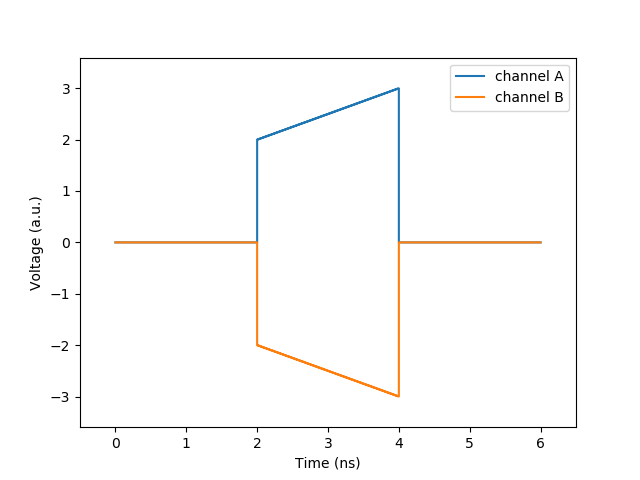

In [1]:
%matplotlib notebook
from qupulse.pulses.plotting import plot
from qupulse.pulses import TablePT

param_entries = {'A': [(0, 0),
                       ('ta', 'va', 'hold'),
                       ('tb', 'vb', 'linear'),
                       ('tend', 0, 'jump')],
                 'B': [(0, 0),
                       ('ta', '-va', 'hold'),
                       ('tb', '-vb', 'linear'),
                       ('tend', 0, 'jump')]}
mirror_pulse = TablePT(param_entries)

parameters = {'ta': 2,
              'va': 2,
              'tb': 4,
              'vb': 3,
              'tend': 6}

_ = plot(mirror_pulse, parameters, sample_rate=100)

You may have noticed that we already used an expression in the entry list: `'-va'` and `'-vb'`. Of course we can also do a bit more complex things with these than a simple negation. Let's have a look at the next example where we use some simple mathematical oeprators and built-in functions:

<IPython.core.display.Javascript object>


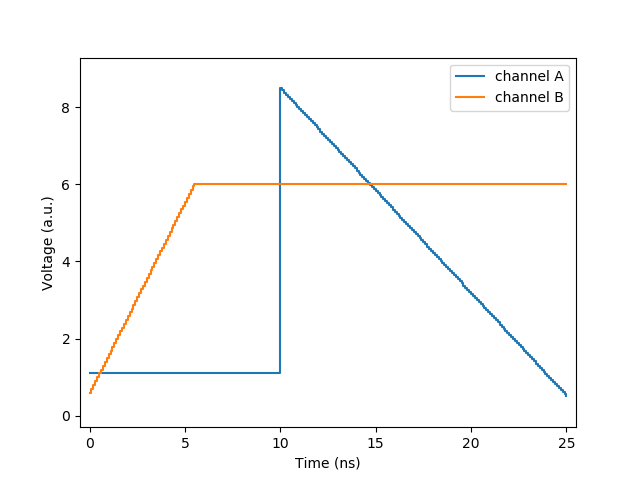

In [2]:
expr_pulse = TablePT({'A': [(0,     'a_0'),
                            ('t_1', 'a_0 + exp(theta)', 'hold'),
                            ('t_2', 'Abs(x_0 - y_0)', 'linear')],
                      'B': [(0,               'b_0'),
                            ('t_1*(b_0/a_0)', 'b_1', 'linear'),
                            ('t_2',           'b_2')]})
_ = plot(expr_pulse, dict(a_0=1.1, theta=2, x_0=0.5, y_0=1, t_1=10, t_2=25, b_0=0.6, b_1=6, b_2=0.4))

 __Is there a requirement that all channels have the same duration?__
 
 No. The shorter channels stay on their last value until the last channel is finished. The duration of the complete pulse template is given as the corresponding expression:

Max(t_A, t_B)


<IPython.core.display.Javascript object>


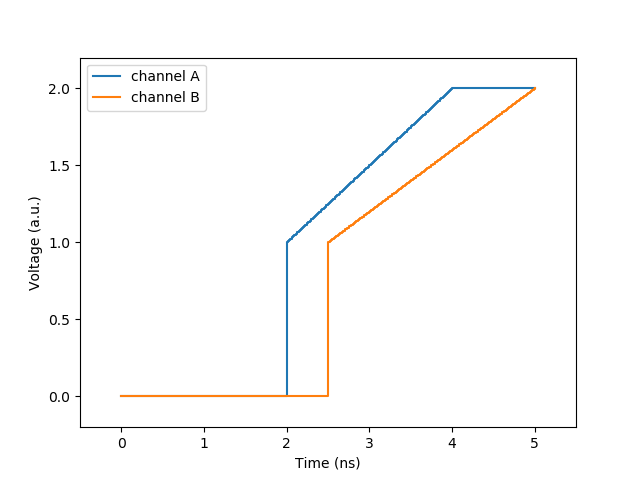

In [3]:
param_entries = {'A': [(0, 0),
                       ('t_A/2', 'va', 'hold'),
                       ('t_A', 'vb', 'linear')],
                 'B': [(0, 0),
                       ('t_B / 2', 'va', 'hold'),
                       ('t_B', 'vb', 'linear')]}

c_pulse = TablePT(param_entries)
print(c_pulse.duration)
_ = plot(c_pulse, dict(t_A=4, t_B=5, va=1, vb=2, t_wait = 2), sample_rate=100)

As you see channel `'A'` only was defined until 4ns and holds this level to the end of the pulse.